<a href="https://colab.research.google.com/github/schwarzichet/IST526-Assignment5/blob/main/Question_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# python visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

In [9]:
from numpy.random import default_rng
rng = default_rng(12345)


n_points = 200
ar_factor = 0.5
w_std = 1

X_t = np.zeros(n_points)

for i in range(1, n_points):
  X_t[i] = ar_factor * X_t[i-1] + rng.normal(0, w_std)

# create a data-frame
dates = pd.date_range(start='2022-04-29', periods=n_points, freq='D')

df_simulated = pd.DataFrame(
  {'Date': dates, 
   'X': X_t
  },
  index = dates
)

display(df_simulated)

# visualiza
fig = px.line(data_frame = df_simulated, y = 'X', markers=True)

# Add rangeslider
fig.update_xaxes(
  rangeslider_visible = True 
)

fig.show()

,Date,X
2022-04-29,2022-04-29,0.000000
2022-04-30,2022-04-30,-1.423825
2022-05-01,2022-05-01,0.551816
2022-05-02,2022-05-02,-0.594754
2022-05-03,2022-05-03,-0.556550
...,...,...
2022-11-10,2022-11-10,0.035000
2022-11-11,2022-11-11,0.703682
2022-11-12,2022-11-12,1.566846
2022-11-13,2022-11-13,0.999482


In [10]:
from statsmodels.graphics import tsaplots # time series plots
from statsmodels.tsa.stattools import  acf

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



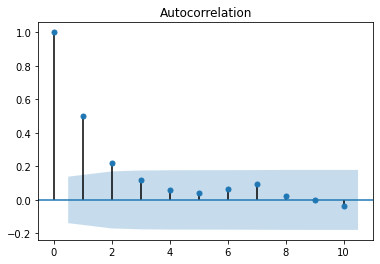

[ 1.          0.50296539  0.22091127  0.11686122  0.06040308  0.0382703
  0.06281649  0.09207996  0.02628865  0.00176565 -0.03775726]


In [11]:
nlag = 10
result = acf(x=X_t,  nlags = nlag)

fig = tsaplots.plot_acf(X_t, lags = nlag)
plt.show()
print(result)

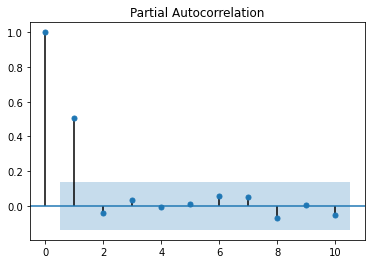

[ 1.          0.50549285 -0.04349406  0.03085008 -0.00452864  0.01164205
  0.05414861  0.0525279  -0.06836765  0.00549386 -0.05423122]


In [12]:
from statsmodels.tsa.stattools import  pacf

result = pacf(x=X_t,  nlags = nlag)

fig = tsaplots.plot_pacf(X_t, lags = nlag)
plt.show()
print(result)

# C
I think the factor will be around 0.5. Beacause for both ACF and PACF, when the lag amount is 1, the correlation is similar to 0.5. And for when the lag amout get larger, the curve for ACF is similar to 0.5^x